# Task 1 Implement a system that can predict the PM2.5 level
Using previous data of Five Chinese Cities Data Set

## Get Data

I already did Data Preprocessing in another Jupyter Notebook File. 

Please find 'Data Preparation' folder which consists of notebook files to see what steps I have done

In [1]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [6]:
DATASET_DIR_PATH = 'Prep_FiveCitiePMData_MEAN' #'PREP_DATASET'
DATASET_FILE_NAME = 'BeijingPM_cleaned.csv' #'PREP_PM_DATASET.csv'
DATASET_FILE_PATH = os.path.join(DATASET_DIR_PATH, DATASET_FILE_NAME)

In [7]:
def load_data_from_csv(data_path):
    return pd.read_csv(data_path)

In [8]:
data = load_data_from_csv(DATASET_FILE_PATH)

In [9]:
data.head()

,Unnamed: 0,No,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,PM
0,0,24,2010,1,1,23,4,-17.0,41.0,1020.0,-5.0,cv,0.89,0.0,0.0,129.0
1,1,25,2010,1,2,0,4,-16.0,38.0,1020.0,-4.0,SE,1.79,0.0,0.0,148.0
2,2,26,2010,1,2,1,4,-15.0,42.0,1020.0,-4.0,SE,2.68,0.0,0.0,159.0
3,3,27,2010,1,2,2,4,-11.0,63.5,1021.0,-5.0,SE,3.57,0.0,0.0,181.0
4,4,28,2010,1,2,3,4,-7.0,85.0,1022.0,-5.0,SE,5.36,0.0,0.0,138.0


We will remove Unnamed column. It is appearing on itself...strange

In [10]:
data = data.drop(['Unnamed: 0'], axis=1)

In [11]:
data.head()

,No,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,PM
0,24,2010,1,1,23,4,-17.0,41.0,1020.0,-5.0,cv,0.89,0.0,0.0,129.0
1,25,2010,1,2,0,4,-16.0,38.0,1020.0,-4.0,SE,1.79,0.0,0.0,148.0
2,26,2010,1,2,1,4,-15.0,42.0,1020.0,-4.0,SE,2.68,0.0,0.0,159.0
3,27,2010,1,2,2,4,-11.0,63.5,1021.0,-5.0,SE,3.57,0.0,0.0,181.0
4,28,2010,1,2,3,4,-7.0,85.0,1022.0,-5.0,SE,5.36,0.0,0.0,138.0


There you go! 5 top rows in dataset

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50351 entries, 0 to 50350
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             50351 non-null  int64  
 1   year           50351 non-null  int64  
 2   month          50351 non-null  int64  
 3   day            50351 non-null  int64  
 4   hour           50351 non-null  int64  
 5   season         50351 non-null  int64  
 6   DEWP           50351 non-null  float64
 7   HUMI           50351 non-null  float64
 8   PRES           50351 non-null  float64
 9   TEMP           50351 non-null  float64
 10  cbwd           50351 non-null  object 
 11  Iws            50351 non-null  float64
 12  precipitation  50351 non-null  float64
 13  Iprec          50351 non-null  float64
 14  PM             50351 non-null  float64
dtypes: float64(8), int64(6), object(1)
memory usage: 5.8+ MB


Cleaned and non-null and no outliers. Everything was removed in Data Preparation Part

And we 436792 instances which is nice

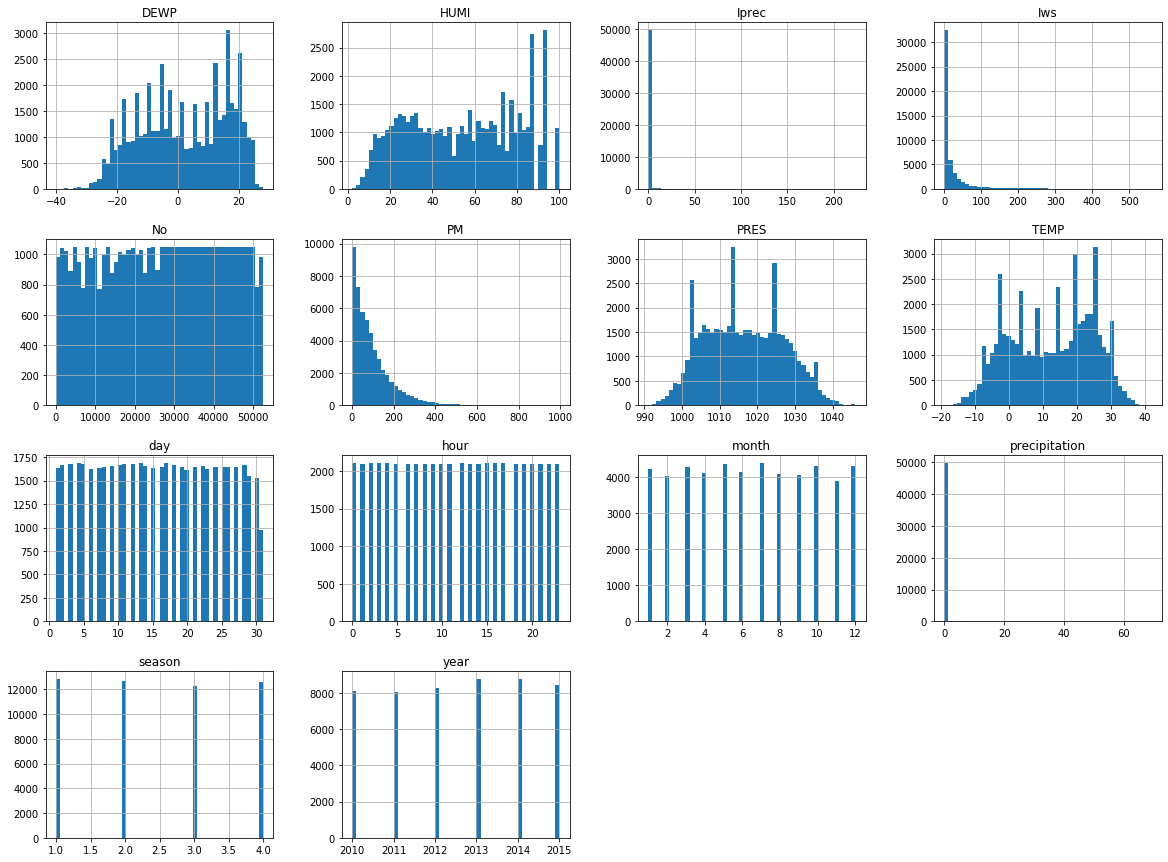

In [13]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
DATA_BEFORE_SPLIT = data.copy()

# Before we start doing analysis create TEST SET and put aside

I will go for 20 % of the data for test set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print('Train instances:', len(train_set), '\nTest instances: ', len(test_set))

Train instances: 40280 
Test instances:  10071


OK, now we are safe that we have a test set that hasn't been seen by us

### Let's Analyze our train data

Let's see a correlations to our PM values

In [17]:
data = train_set.copy()

In [18]:
corr_matrix = data.corr()

In [19]:
corr_matrix['PM'].sort_values(ascending=False)

PM               1.000000
HUMI             0.425022
DEWP             0.146742
season           0.118982
day              0.075205
hour             0.000863
month           -0.000947
precipitation   -0.026398
PRES            -0.028674
Iprec           -0.044050
No              -0.054587
year            -0.056297
TEMP            -0.110854
Iws             -0.242512
Name: PM, dtype: float64

As you can see TEMP, Iws, HUMI, season, PRES make impact the most. 

But correlation measures only linear relationship, but what if we have non-linear?

Let's have a plots of PM with each of these 'TEMP', 'Iws', 'HUMI', 'season', 'PRES'

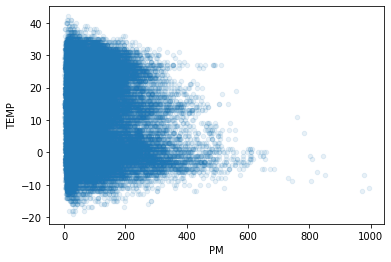

In [20]:
data.plot(kind='scatter', x='PM', y='TEMP', alpha=0.1)

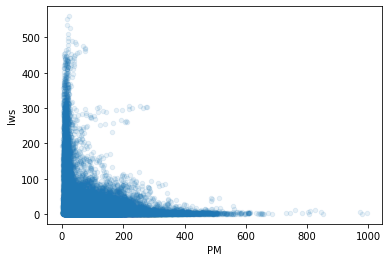

In [21]:
data.plot(kind='scatter', x='PM', y='Iws', alpha=0.1)

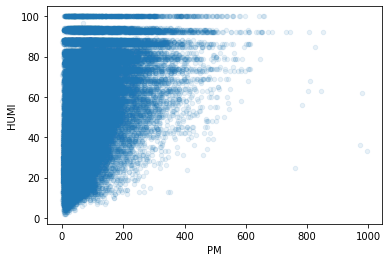

In [22]:
data.plot(kind='scatter', x='PM', y='HUMI', alpha=0.1)

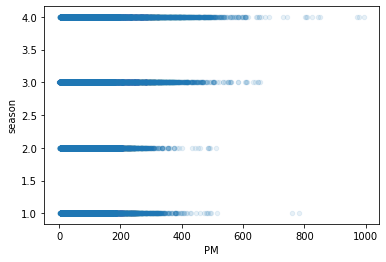

In [23]:
data.plot(kind='scatter', x='PM', y='season', alpha=0.1)

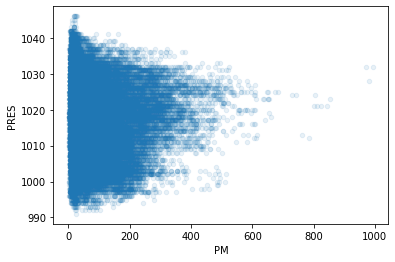

In [24]:
data.plot(kind='scatter', x='PM', y='PRES', alpha=0.1)

Well...not so many information we can get from it. There is a correlation, however not strong one

# Prepare data for algorithm

Before I feed my data to algorithm I need to prepare it first.

1. I need to deal with cbwd feature and transfer it to numerical format
2. I need to Standartize my data (Subtract mean and divide by variance)

In [25]:
data_labels = data['PM'].copy()

Extracting labels away from all features

In [26]:
data_labels.head()

38322    107.25
21131     53.00
29695     30.75
39366     39.75
18367     18.00
Name: PM, dtype: float64

In [27]:
data = data.drop("PM", axis=1)

Dropping PM attribute

In [28]:
data.head()

,No,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
38322,40216,2014,8,3,15,2,24.0,56.0,1000.0,34.0,NW,8.04,0.0,0.0
21131,22735,2012,8,5,6,2,24.0,100.0,1011.0,24.0,SE,3.57,0.0,0.0
29695,31589,2013,8,9,4,2,17.0,77.0,1000.0,21.0,NW,20.12,0.0,0.0
39366,41261,2014,9,16,4,3,10.0,76.0,1018.0,14.0,NW,1.79,0.0,0.0
18367,19848,2012,4,6,23,1,-8.0,35.0,1022.0,6.0,SE,29.06,0.0,0.0


In [29]:
def extract_labels(data):
    data_labels = data['PM'].copy()
    data = data.drop("PM", axis=1)
    return data, data_labels

**Handling text attributes cbwd and City**. 

We will convert labels to numbers. 
We will use OneHot encoding to convert categorical data (City) to numberical and convert cbwd to Simple Numbers

In [30]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [31]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [36]:
num_attribs = list(data.columns)
num_attribs.remove('cbwd')
#num_attribs.remove('City')


transform_pipeline = ColumnTransformer([
        ("cbwd", OrdinalEncoder(), ['cbwd']),
        #("city", OneHotEncoder(), ['City']),
        ("num", num_pipeline, num_attribs),
    ])

data_prepared = transform_pipeline.fit_transform(data)

In [37]:
data_prepared

array([[ 1.        ,  0.89828884,  0.85597376, ..., -0.30976393,
        -0.07707254, -0.08390197],
       [ 2.        , -0.26218505, -0.3225207 , ..., -0.40090613,
        -0.07707254, -0.08390197],
       [ 1.        ,  0.32558658,  0.26672653, ..., -0.06345571,
        -0.07707254, -0.08390197],
       ...,
       [ 2.        ,  0.88740172,  0.85597376, ...,  0.31028847,
        -0.07707254, -0.08390197],
       [ 3.        , -1.70831302, -1.50101516, ..., -0.43740379,
        -0.07707254, -0.08390197],
       [ 0.        , -0.63022276, -0.91176793, ..., -0.19109557,
        -0.07707254, -0.08390197]])

In [38]:
data_prepared.shape

(40280, 14)

In [39]:
data_labels.shape

(40280,)

Now we have data centered at 0 which is nice for our ML algorithm

# Prepare Test Set

Prepare Data for Testing. We have to prepare data in the same way as train data

In [40]:
data_test = test_set.drop('PM', axis=1)
data_test_labels = test_set['PM'].copy()

In [41]:
data_test.head()

,No,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
28079,29971,2013,6,2,18,2,17.0,61.0,1001.0,25.0,SE,38.45,0.0,0.0
1570,1662,2010,3,11,5,1,-8.0,73.0,1013.0,-4.0,NW,1.79,0.0,0.0
3366,3497,2010,5,26,16,1,10.0,30.0,1012.0,29.0,SE,40.24,0.0,0.0
45082,46978,2015,5,12,9,1,4.0,37.0,997.0,19.0,NW,4.92,0.0,0.0
15000,16393,2011,11,15,0,3,-4.0,64.0,1027.0,2.0,cv,0.45,0.0,0.0


In [42]:
data_test_labels.head()

28079    146.75
1570     135.00
3366      72.00
45082     10.50
15000    333.00
Name: PM, dtype: float64

In [43]:
data_test_prepared = transform_pipeline.transform(data_test)

Test set is prepared as well

# Summary of all steps above

In [46]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

DATASET_DIR_PATH = 'Prep_FiveCitiePMData_MEAN' #'PREP_DATASET'
DATASET_FILE_NAME = 'BeijingPM_cleaned.csv' #'PREP_PM_DATASET.csv'

def get_data(DATASET_DIR_PATH=DATASET_DIR_PATH, DATASET_FILE_NAME=DATASET_FILE_NAME):
    DATASET_FILE_PATH = os.path.join(DATASET_DIR_PATH, DATASET_FILE_NAME)
    data = pd.read_csv(DATASET_FILE_PATH)
    data = data.drop(['Unnamed: 0'], axis=1)
    return data

def extract_data_and_labels(data):
    data_labels = data['PM'].copy()
    data = data.drop("PM", axis=1)
    return data, data_labels

def prep_data_for_algo(data):
    num_attribs = list(data.columns)
    num_attribs.remove('cbwd')
    #num_attribs.remove('City')
    
    num_pipeline = Pipeline([
            ('std_scaler', StandardScaler()),
        ])
    
    transform_pipeline = ColumnTransformer([
            ("cbwd", OrdinalEncoder(), ['cbwd']),
            #("city", OneHotEncoder(), ['City']),
            ("num", num_pipeline, num_attribs),
        ])
    data_prepared = transform_pipeline.fit_transform(data)
    return data_prepared

data = get_data()
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

data_train, data_train_labels = extract_data_and_labels(train_set)
data_test, data_test_labels = extract_data_and_labels(test_set)

data_train_prepared = prep_data_for_algo(data_train)
data_test_prepared = prep_data_for_algo(data_test)

# Training

Finally we are ready to start training. I will train different ML algorithms model and try to predict on the same data it was trained in order to check whether ML algorithm learned something  

## Train and Cross Validate

So, I have decided to combine training and Cross Validation steps in one section in order to find best model for TEST evaluation

as a Scoring technique in Cross Validation I will use MSE

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score

In [48]:
def display_results(scores):
    print('-----------------------------------------\n')
    print('Cross Validation MSE\n')
    print('Scores: ', scores)
    print('Average MSE: ', scores.mean())
    print('Average RMSE: ', np.sqrt(scores.mean()))
    print('\n-----------------------------------------\n')

### Linear Regression 

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lin_reg = LinearRegression()

In [51]:
lin_reg_scores = cross_val_score(lin_reg, data_train_prepared, data_train_labels, 
                             scoring="neg_mean_squared_error", cv=5)
display_results(-lin_reg_scores)

-----------------------------------------

Cross Validation MSE

Scores:  [5721.33182967 6139.72690061 5821.1353172  5573.9136687  5918.58042736]
Average MSE:  5834.937628707687
Average RMSE:  76.3867634391436

-----------------------------------------



In [52]:
lin_reg.fit(data_train_prepared, data_train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Decision Tree regressor

Imperically, I tried to find nice parameters and tune the model according to the Cross Validation scores

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
tree_reg = DecisionTreeRegressor(max_features=14, max_depth=25)

In [64]:
tree_reg_scores = cross_val_score(tree_reg, data_train_prepared, data_train_labels, 
                             scoring="neg_mean_squared_error", cv=5)
display_results(-tree_reg_scores)

-----------------------------------------

Cross Validation MSE

Scores:  [2619.45984959 2704.15505412 3105.69633789 2676.52412337 2605.62344418]
Average MSE:  2742.2917618303372
Average RMSE:  52.366895667304334

-----------------------------------------



In [65]:
tree_reg.fit(data_train_prepared, data_train_labels)

DecisionTreeRegressor(criterion='mse', max_depth=25, max_features=14,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### Random Forest Regressor

Imperically, I tried to find nice parameters and tune the model according to the Cross Validation scores

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
random_forest_reg = RandomForestRegressor(n_estimators=100, max_features=14, max_depth=25)

In [69]:
random_forest_reg_scores = cross_val_score(random_forest_reg, data_train_prepared, data_train_labels, 
                             scoring="neg_mean_squared_error", cv=5)
display_results(-random_forest_reg_scores)

-----------------------------------------

Cross Validation MSE

Scores:  [1291.32650721 1343.59955415 1312.45870165 1216.00464394 1226.44012658]
Average MSE:  1277.9659067080456
Average RMSE:  35.748649019341215

-----------------------------------------



In [70]:
random_forest_reg.fit(data_train_prepared, data_train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features=14, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# TEST SET EVALUATION 

We are going to use trained models for testing one by one

Below, evaluation metrics will be used for evaluation

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [72]:
def predict_and_evaluate(model, data_test, data_test_labels, display=True):
    model_predictions = model.predict(data_test)
    model_mse = mean_squared_error(data_test_labels, model_predictions)
    model_rmse = np.sqrt(model_mse)
    model_r2 = r2_score(data_test_labels, model_predictions)
    if display:
        print('-> TEST SET EVALUATION', '\nMSE: ', model_mse, '\nRMSE: ', 
          model_rmse, '\nR2 score: ', model_r2)
    results = [model_mse, model_rmse, model_r2]
    return model_predictions, results

In [73]:
def plot_actual_vs_predicted(actual, predicted):
    fig,ax = plt.subplots()
    ax.scatter(actual, predicted)
    ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    fig.show()

Let's start with Linear Regression

## Linear Regression

In [74]:
lin_reg_predictions, lin_reg_results = predict_and_evaluate(lin_reg, data_test_prepared, data_test_labels)

-> TEST SET EVALUATION 
MSE:  5720.582531302023 
RMSE:  75.63453266400225 
R2 score:  0.287122750925105


C:\Anaconda3\envs\pm25\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


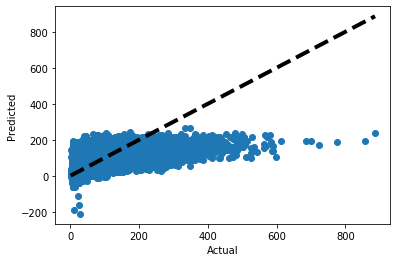

In [75]:
plot_actual_vs_predicted(data_test_labels, lin_reg_predictions)

## Decision Tree

In [76]:
tree_predictions, tree_results = predict_and_evaluate(tree_reg, data_test_prepared, data_test_labels)

-> TEST SET EVALUATION 
MSE:  4912.486706107801 
RMSE:  70.08913400883051 
R2 score:  0.3878245808001559


C:\Anaconda3\envs\pm25\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


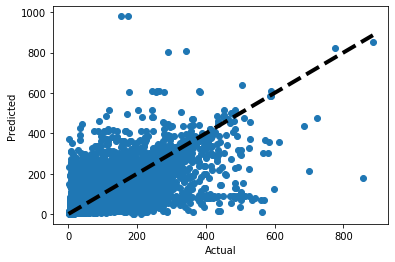

In [77]:
plot_actual_vs_predicted(data_test_labels, tree_predictions)

## Random Forest

In [78]:
rnd_clf_predictions, rnd_clf_results = predict_and_evaluate(random_forest_reg, data_test_prepared, data_test_labels)

-> TEST SET EVALUATION 
MSE:  2364.7701052004236 
RMSE:  48.628901953472315 
R2 score:  0.7053113388251149


C:\Anaconda3\envs\pm25\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


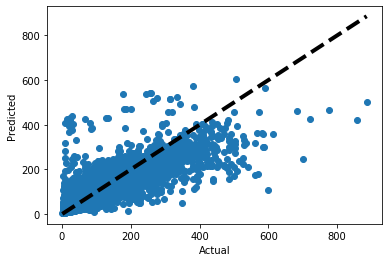

In [79]:
plot_actual_vs_predicted(data_test_labels, rnd_clf_predictions)

In [80]:
test_results = [lin_reg_results, tree_results, rnd_clf_results]

# RESULTS SUMMARY

In [81]:
def plot_final_result(title, results, metrics_index):
    plt.style.use('ggplot')
    x = ['Linear Regression', 'Decision Tree', 'Random Forest']
    vals = []
    for model in results:
        vals.append(model[metrics_index])

    x_pos = [i for i, _ in enumerate(x)]
    plt.bar(x_pos, vals, color=['red', 'green', 'blue'])
    plt.xlabel("Models")
    plt.ylabel("Value")
    plt.title(title)
    plt.xticks(x_pos, x)
    plt.show()

## Mean Square Error

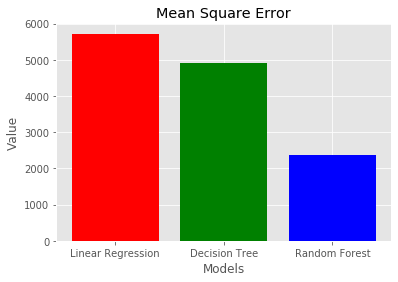

In [82]:
plot_final_result(title='Mean Square Error', results=test_results, metrics_index=0)

The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them

**Conclusion**: **BEST MODEL - RANDOM FOREST** average error in square is MSE:  474.6362469150816

## Root Mean Square Error

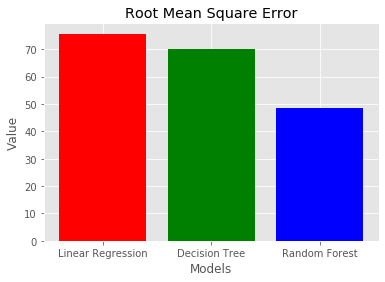

In [83]:
plot_final_result(title='Root Mean Square Error', results=test_results, metrics_index=1)

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

**Conclusion**: **BEST MODEL - RANDOM FOREST** predicting us PM2.5 valu with error +-20 units. RMSE:  21.786148051344036

## R2 score

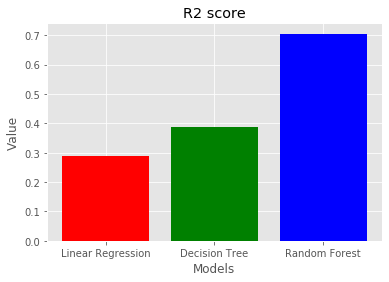

In [84]:
plot_final_result(title='R2 score', results=test_results, metrics_index=2)

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

* 0% indicates that the model explains none of the variability of the response data around its mean.
* 100% indicates that the model explains all the variability of the response data around its mean.

**Conclusion**: **BEST MODEL - RANDOM FOREST** explains 90% the variability of the response data around its mean. R2 score:  0.8969523276582472